In [1]:
# windows only hack for graphviz path 
import os
for path in os.environ['PATH'].split(os.pathsep):
    if path.endswith("Library\\bin"):
        os.environ['PATH']+=os.pathsep+os.path.join(path, 'graphviz')

In [2]:
import tensorflow as tf

In [3]:
import numpy as np


In [4]:
# 下面兩個是用來輔助圖形化
from IPython.display import display
from tfdot import tfdot

In [5]:
matrix1 = tf.constant([[100., 80., 70]], name="matrix1")

matrix2 = tf.constant([[2.],[1.],[1.5]], name="matrix2")

matrix1, matrix2

(<tf.Tensor 'matrix1:0' shape=(1, 3) dtype=float32>,
 <tf.Tensor 'matrix2:0' shape=(3, 1) dtype=float32>)

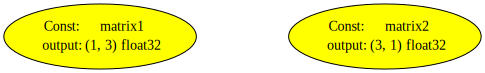

In [6]:
tfdot()

In [7]:
matrix1

<tf.Tensor 'matrix1:0' shape=(1, 3) dtype=float32>

In [8]:
matrix2

<tf.Tensor 'matrix2:0' shape=(3, 1) dtype=float32>

In [9]:
product = tf.matmul(matrix1, matrix2, name="product")

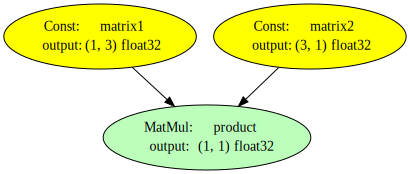

In [10]:
tfdot()

In [11]:
product2 = matrix1 * matrix2
product1 = matrix1 * matrix1

In [12]:
matrix1.graph

In [13]:
tf.get_default_graph().get_tensor_by_name('product:0')

<tf.Tensor 'product:0' shape=(1, 1) dtype=float32>

In [14]:
sess = tf.Session()

In [15]:
sess.run(product)

array([[ 385.]], dtype=float32)

In [16]:
r = tf.constant(np.random.uniform(size=(10,10)))

In [17]:
(r*2+5)**2

<tf.Tensor 'pow:0' shape=(10, 10) dtype=float64>

In [ ]:
tf.pow(tf.add(tf.multiply(r, tf.constant(2)), tf.constant(5)), tf.constant(2))

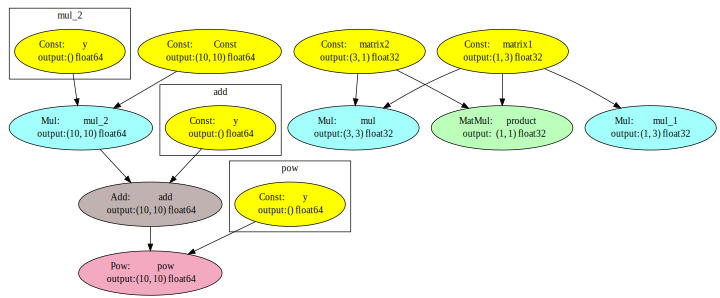

In [18]:
tfdot()

In [19]:
sess.run(r)

array([[ 0.6564928 ,  0.89752944,  0.00950313,  0.01959879,  0.66376606,
         0.47972814,  0.33977197,  0.48733407,  0.84487915,  0.01728203],
       [ 0.10289777,  0.36094782,  0.95945335,  0.45678423,  0.40319227,
         0.01071686,  0.15657952,  0.25067073,  0.16870128,  0.24521842],
       [ 0.02584031,  0.7971886 ,  0.03153704,  0.61990771,  0.03424034,
         0.98622182,  0.86410578,  0.15244178,  0.37044408,  0.9651362 ],
       [ 0.38059895,  0.47441651,  0.722769  ,  0.94211774,  0.45249626,
         0.5140406 ,  0.07382004,  0.03412865,  0.7292478 ,  0.81907851],
       [ 0.91976181,  0.1221995 ,  0.60928778,  0.16934768,  0.83698631,
         0.94822931,  0.86028519,  0.57065579,  0.24308338,  0.22448597],
       [ 0.54626751,  0.8600256 ,  0.91299264,  0.90306474,  0.14793775,
         0.90994281,  0.18768642,  0.53994203,  0.73440462,  0.44709712],
       [ 0.30919458,  0.85464119,  0.98537862,  0.80195372,  0.53543322,
         0.07070826,  0.23994253,  0.25530236

In [20]:
sess.run(product2)

array([[ 200.,  160.,  140.],
       [ 100.,   80.,   70.],
       [ 150.,  120.,  105.]], dtype=float32)

In [21]:
sess.run(product1)

array([[ 10000.,   6400.,   4900.]], dtype=float32)

In [22]:
sess.close()

In [25]:
with tf.Session() as sess:
    result = sess.run(product1)

In [26]:
print(result)

[[ 10000.   6400.   4900.]]


In [28]:
with tf.Session():
    print(product1.eval())
    print(product.eval())


[[ 10000.   6400.   4900.]]
[[ 385.]]


In [29]:
sess  = tf.InteractiveSession()

In [31]:
product2.eval()

array([[ 200.,  160.,  140.],
       [ 100.,   80.,   70.],
       [ 150.,  120.,  105.]], dtype=float32)

In [33]:
graphs = tf.get_default_graph()

In [34]:
graphs.get_operations()

[<tf.Operation 'matrix1' type=Const>,
 <tf.Operation 'matrix2' type=Const>,
 <tf.Operation 'product' type=MatMul>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'mul_1' type=Mul>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'mul_2/y' type=Const>,
 <tf.Operation 'mul_2' type=Mul>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=Add>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>]

In [ ]:
# %load q_run_all_op.py
with tf.Session() as sess:
    for op in tf.get_default_graph().get_operations():
        print(op.name, sess.run(op.outputs))

In [40]:
with tf.Session() as sess:
    print(sess.run([product, product, product]))

[array([[ 385.]], dtype=float32), array([[ 385.]], dtype=float32), array([[ 385.]], dtype=float32)]
